In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
sys.path.append(os.path.join('..'))
from physics215ProjectCode import reconstruct_signal as rs

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

In [2]:
reg2 = []
reg4 = []
reg8 = []
reg16 = []
reg32 = []
reg64 = []
reg128 = []
reg256 = []
sub2 = []
sub4 = []
sub8 = []
sub16 = []
sub32 = []
sub64 = []
sub128 = []
sub256 = []

In [ ]:
n = 4096
initial_frequency = 30
final_frequency = 630
increments = 60

p = 2 ** np.arange(3, 12)
orig_signal_per_p = []
recon_reg_per_p = []
recon_sub_per_p = []
PSD_orig_per_p = []
PSD_reg_per_p = []
PSD_sub_per_p = []
err_reg_per_p = []
err_sub_per_p = []
frequencies = np.arange(initial_frequency, final_frequency + 1, increments)
no_of_waves = np.arange(1,len(frequencies)+1)
t = np.linspace(0,1,n)

for i in p:
    orig_signal, recon_reg, recon_sub, PSD_orig, PSD_reg, PSD_sub, error_reg, error_sub = rs.recon(n, i, initial_frequency, final_frequency, increments)
    orig_signal_per_p.append(orig_signal)
    recon_reg_per_p.append(recon_reg)
    recon_sub_per_p.append(recon_sub)
    PSD_orig_per_p.append(PSD_orig)
    PSD_reg_per_p.append(PSD_reg)
    PSD_sub_per_p.append(PSD_sub)
    err_reg_per_p.append(error_reg)
    err_sub_per_p.append(error_sub)

Plotting the original signal wile adding a cosine with a different frequency every iteration:

Frequencies [Hz] used: 30, 90, 150, 210, 270, 330, 390, 450, 510, 570, 630

The same for all p

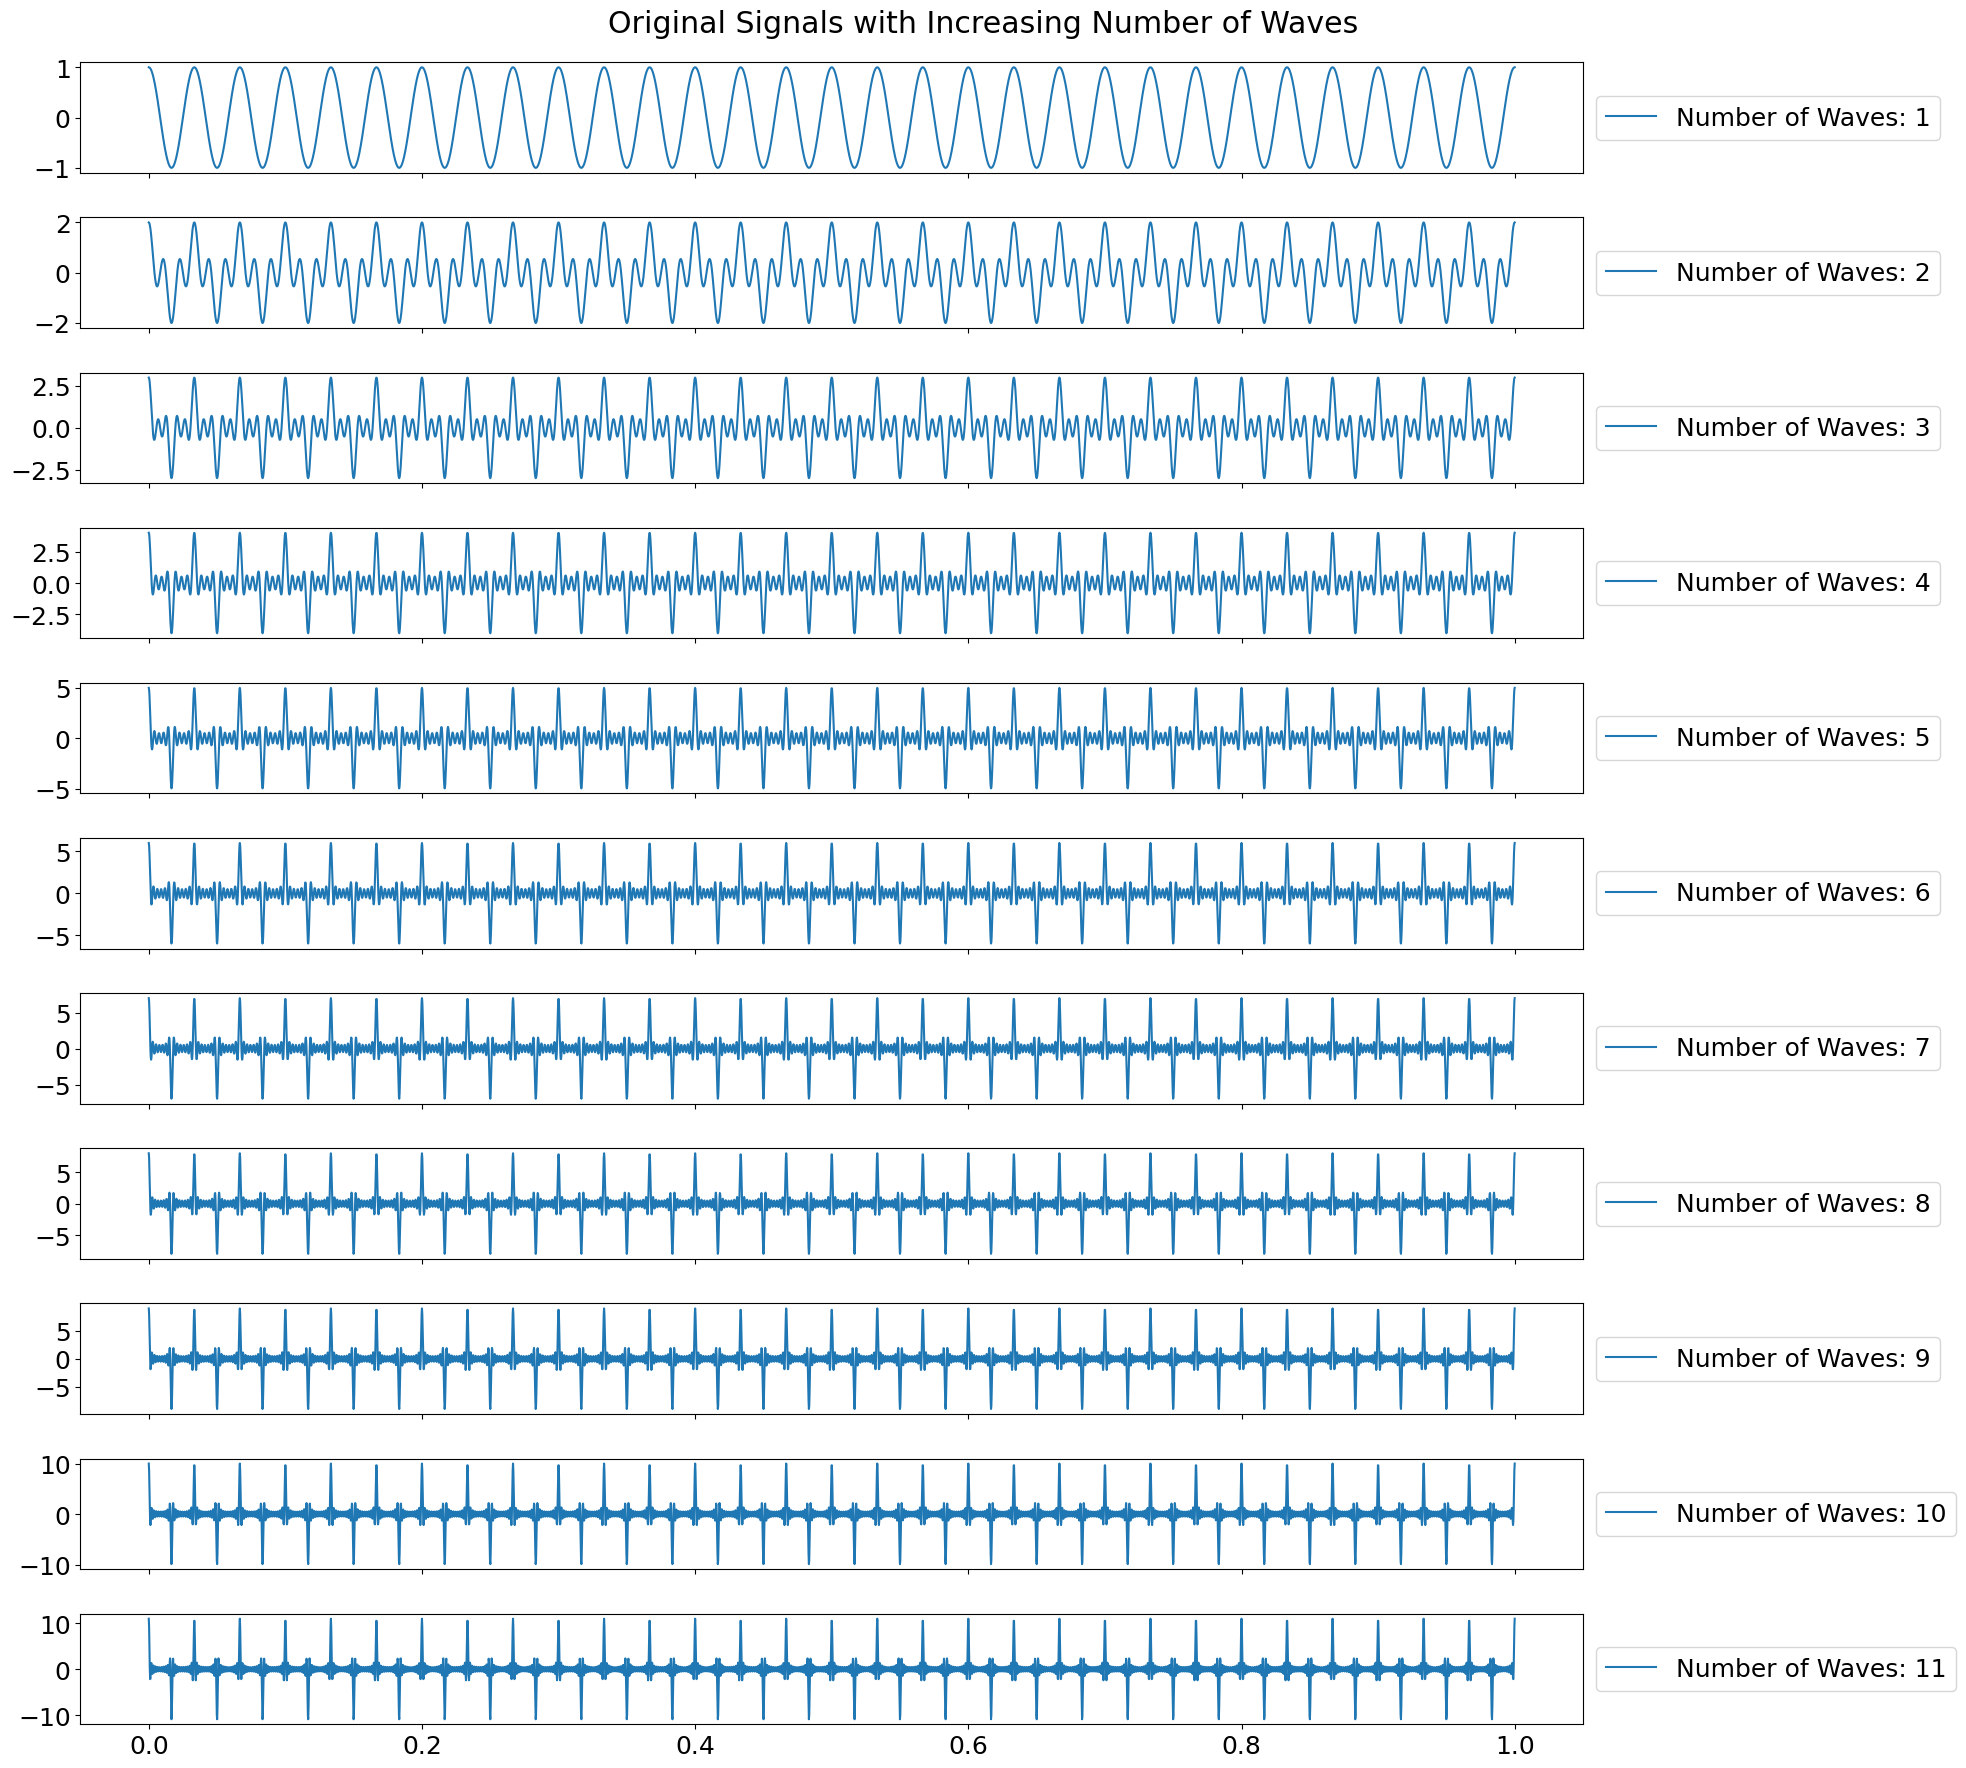

In [3]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(t,orig_signal_per_p[0][i], label = "Number of Waves: " + str(i+1))
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("Original Signals with Increasing Number of Waves")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

PSD of original signal:

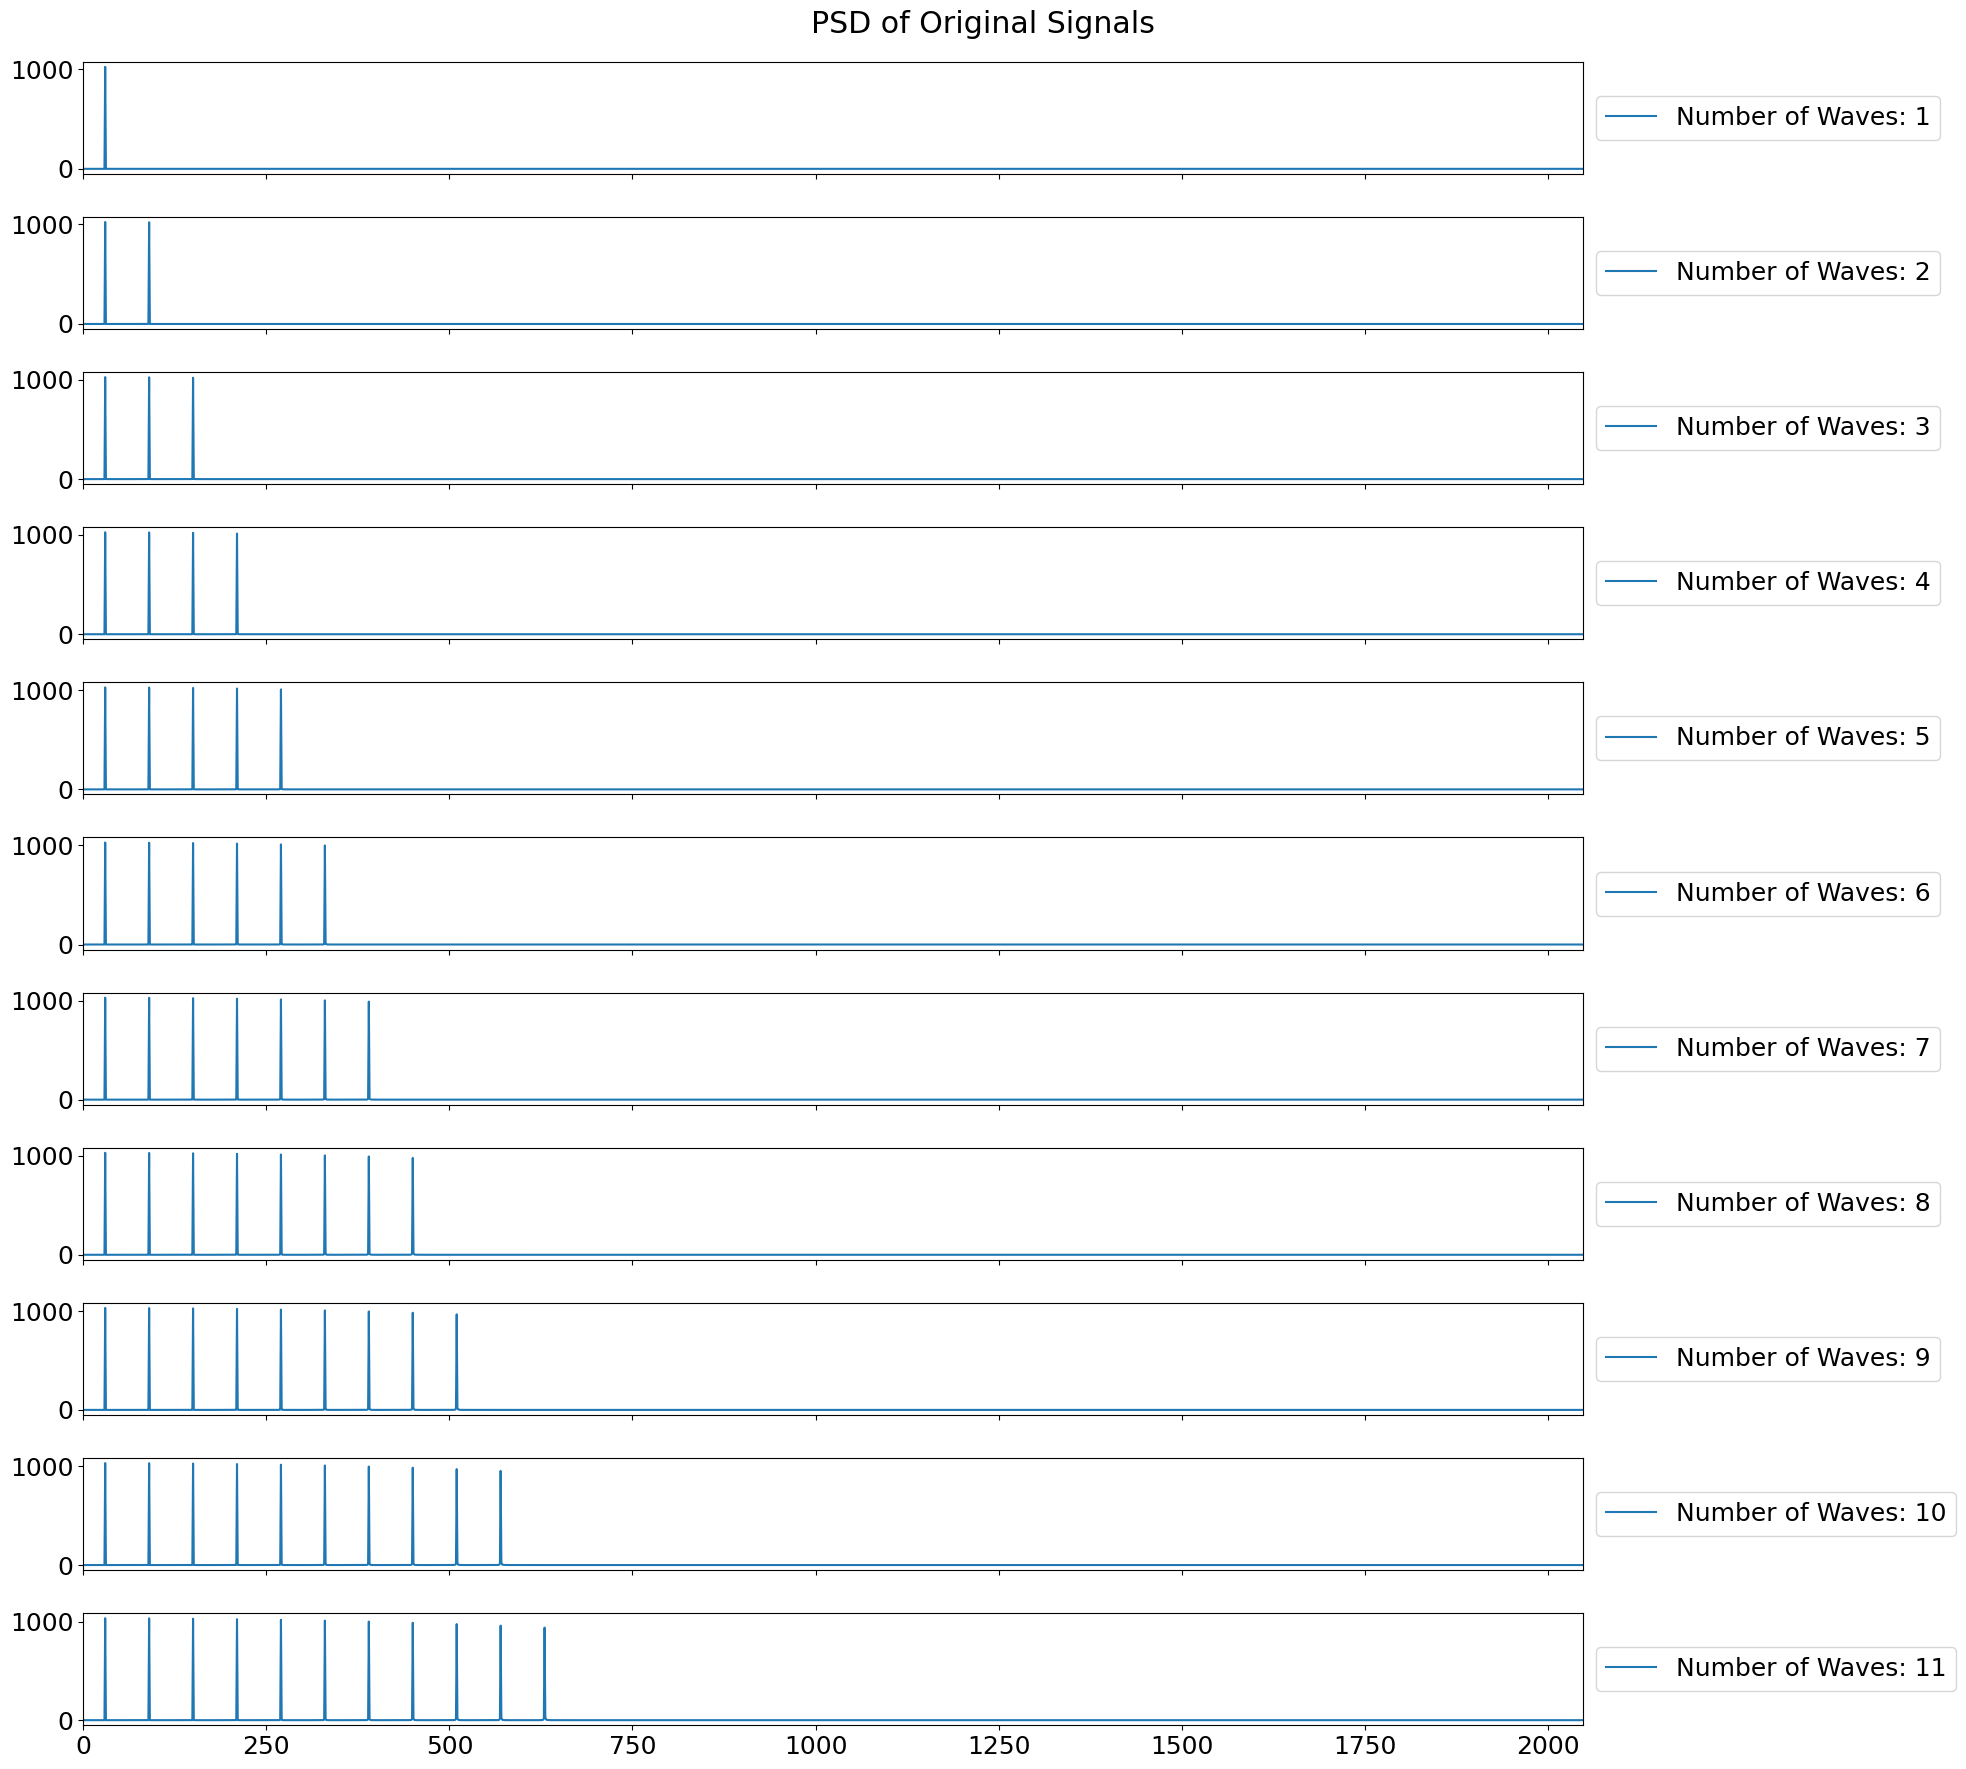

In [4]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(abs(PSD_orig_per_p[0][i]), label = "Number of Waves: " + str(i+1))
    axs[i].set_xlim(0,n/2)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Original Signals")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Plotting reconstructed above Nyquist frequency:

The same for all p

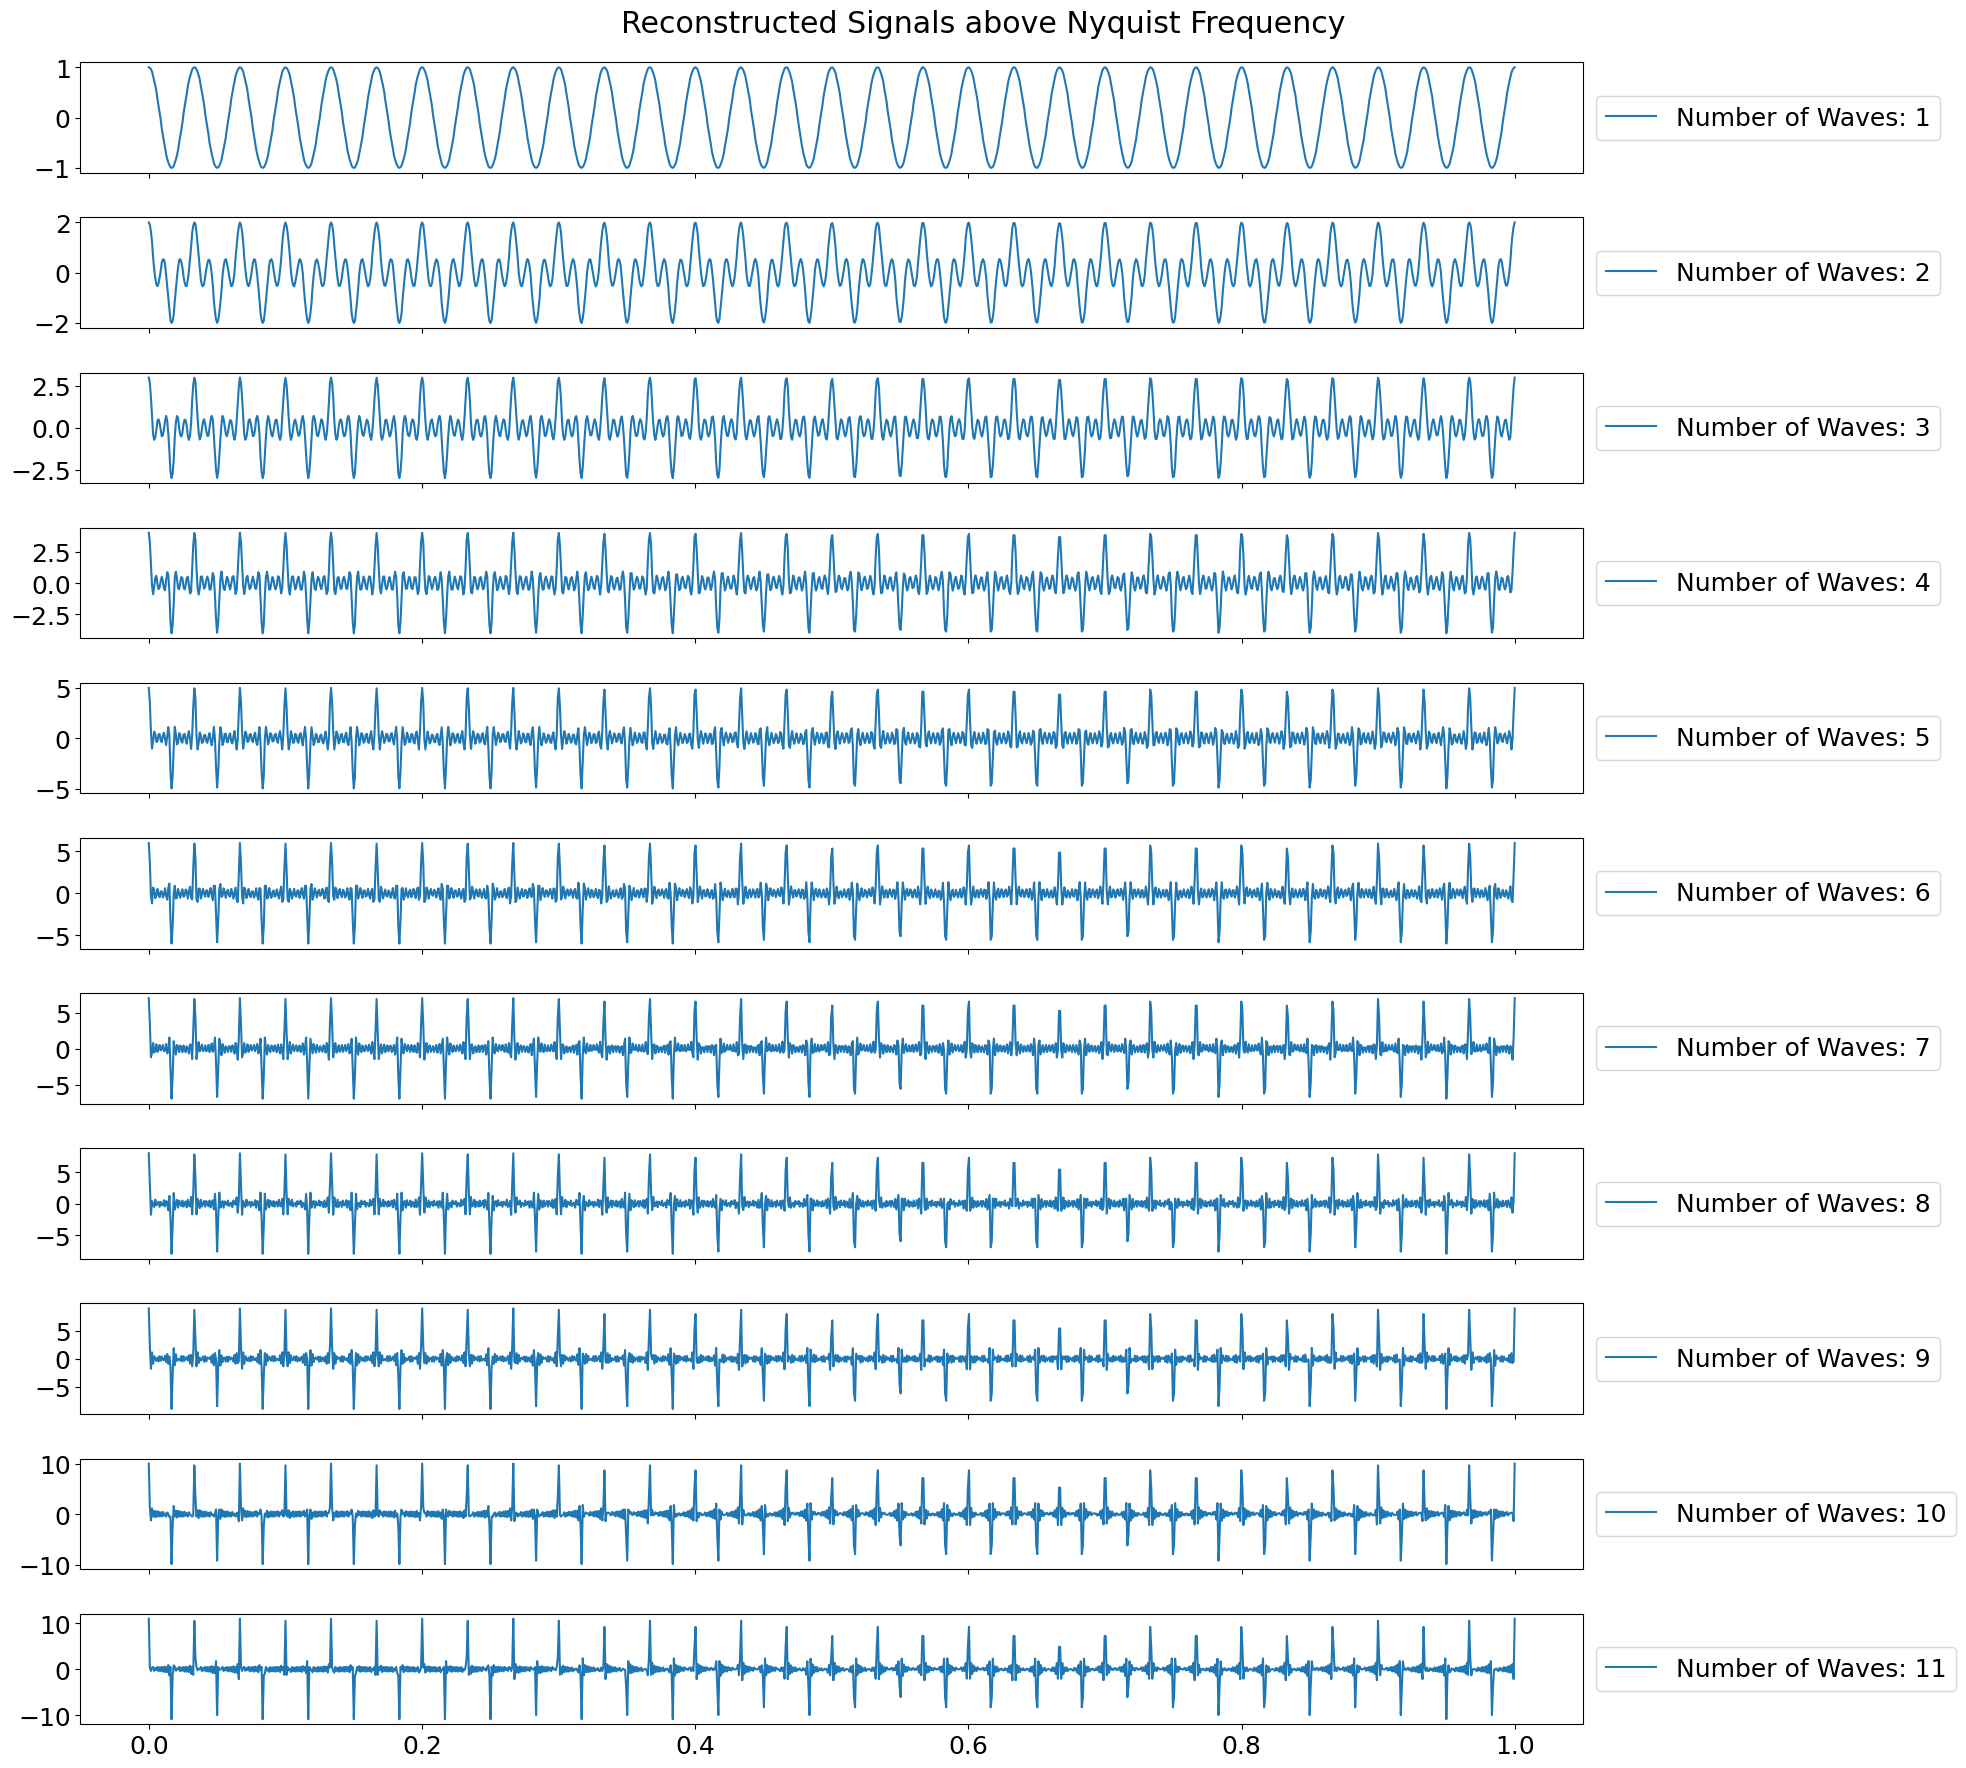

In [5]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})
t_recon = np.linspace(0,1,final_frequency * 2)

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(t_recon,recon_reg_per_p[0][i], label = "Number of Waves: " + str(i+1))
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("Reconstructed Signals above Nyquist Frequency")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Plotting PSD of above Nyquist frequency reconstruction:

The placements of the peaks in the PSD should align with the frequencies of the signal (i.e. 30Hz, 90Hz, etc.). The peaks being spaced farther apart is a result of it being sampled. All 4096 points are not taken. If the samples taken are increased, it would look more like the PSD of the original signal. However, they are still evenly spaced.

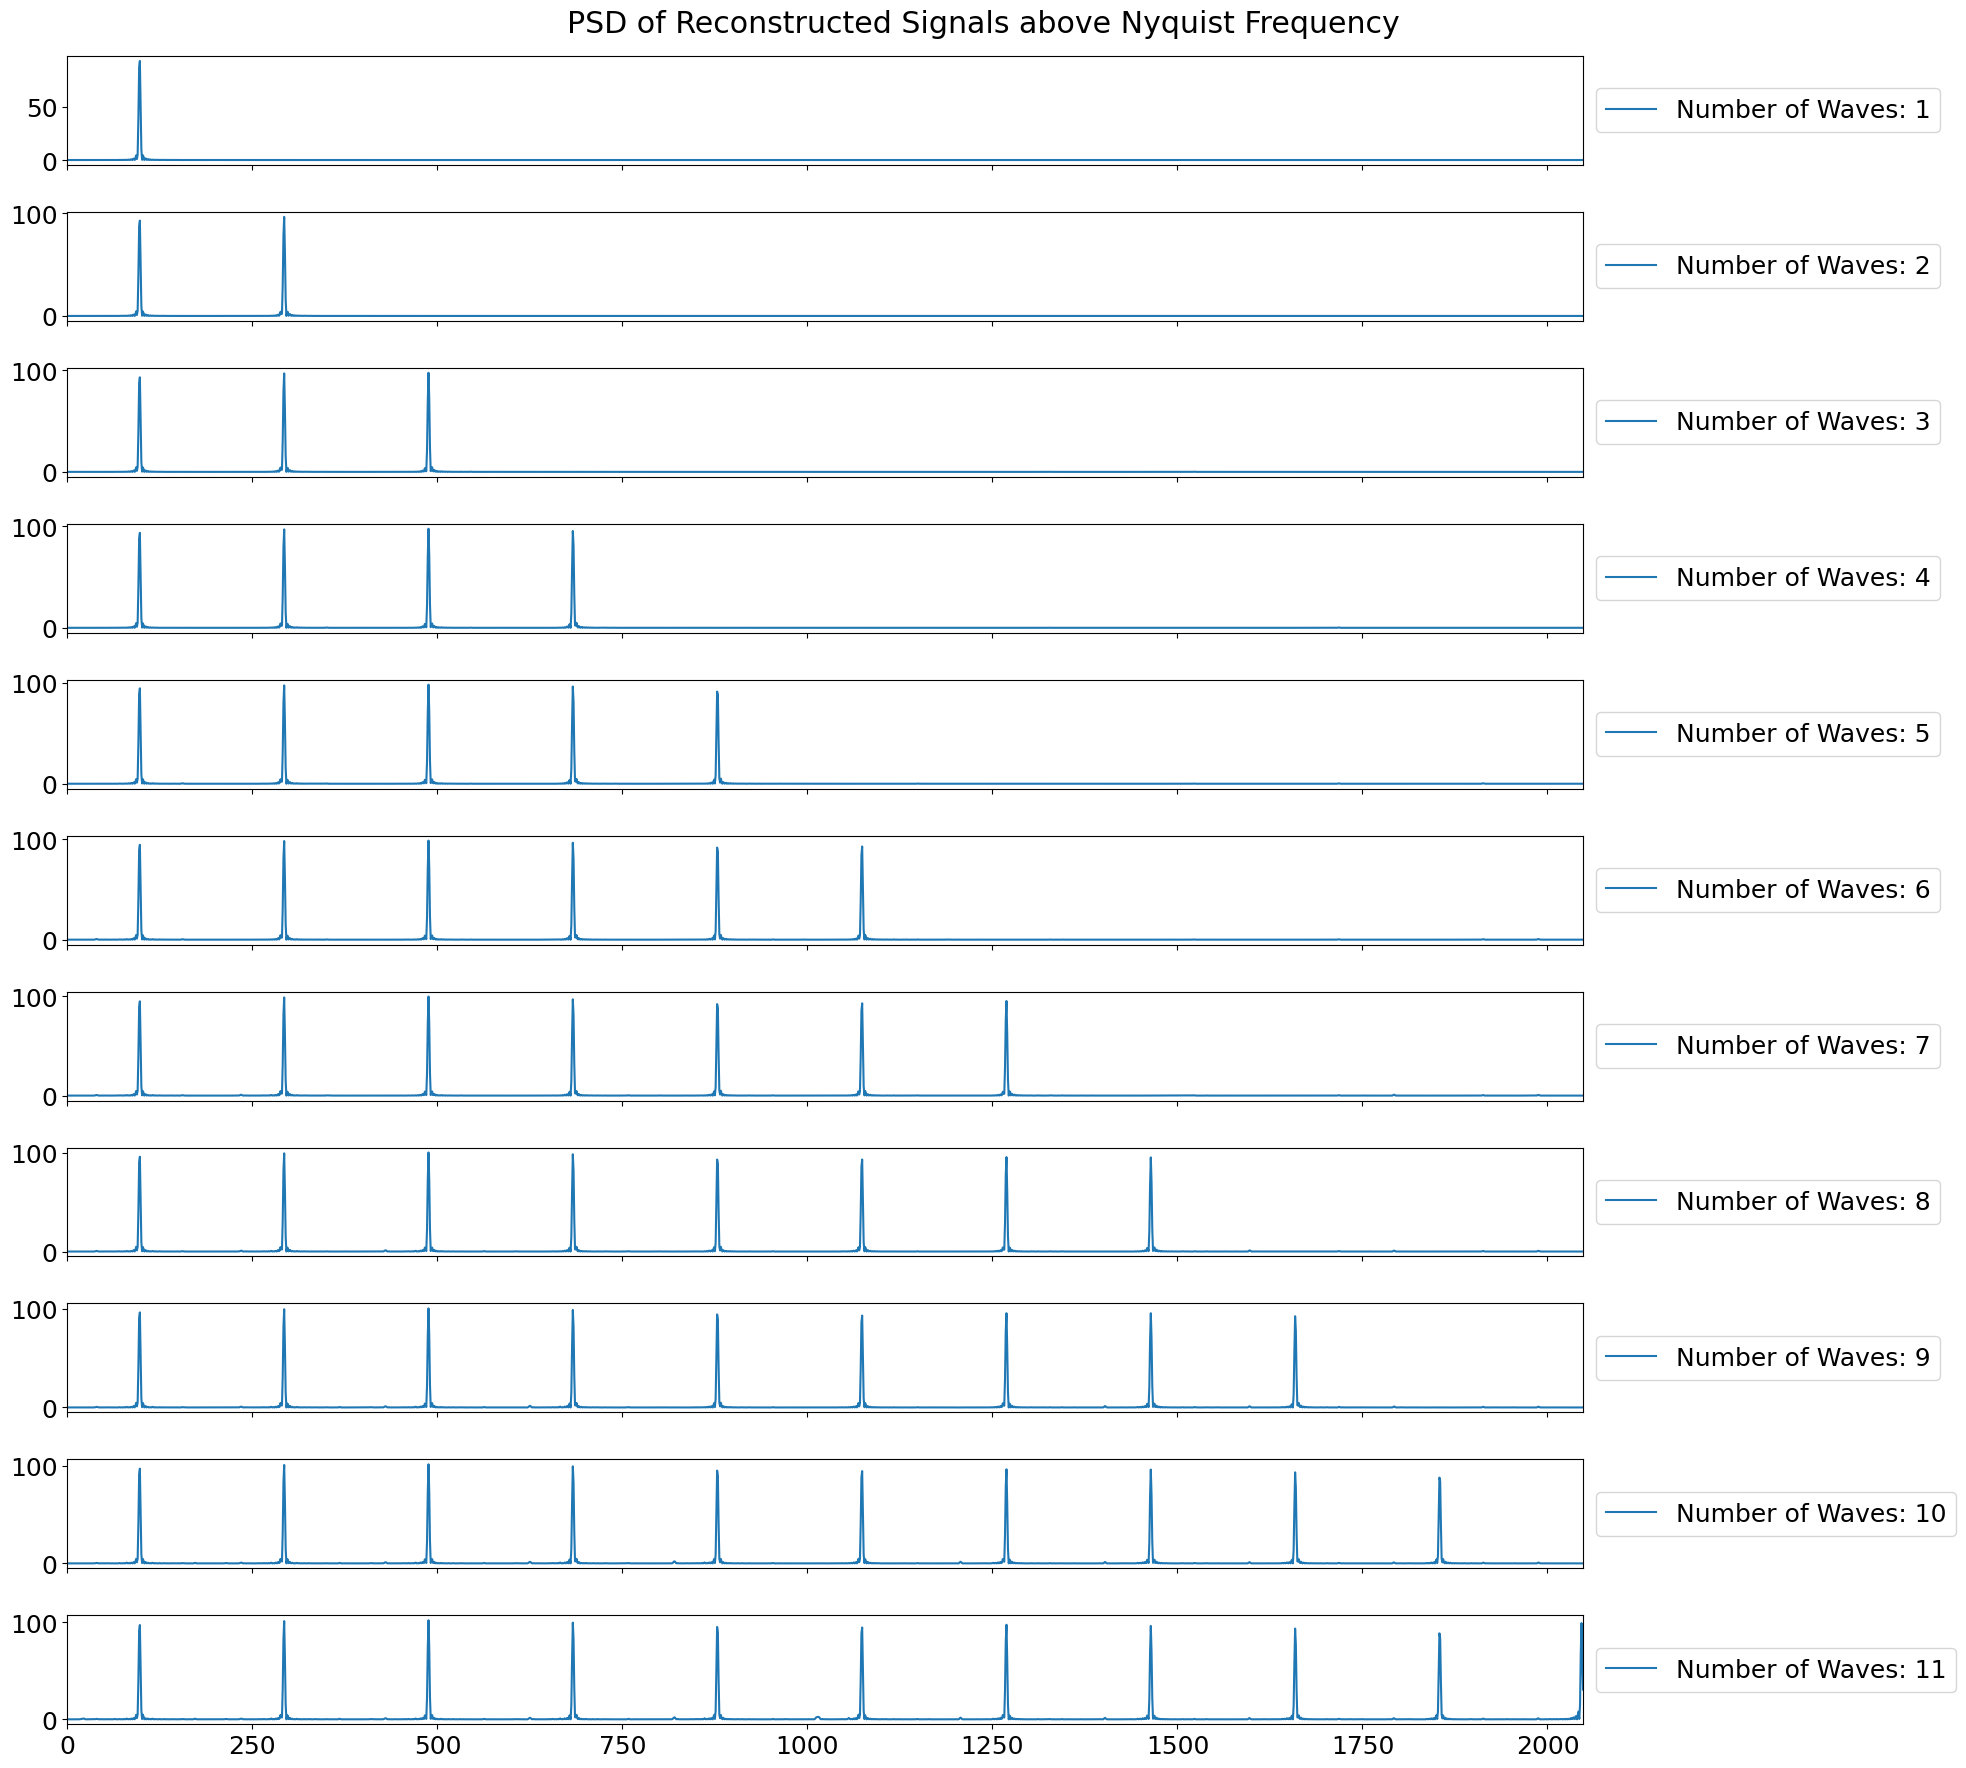

In [6]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(abs(PSD_reg_per_p[0][i]), label = "Number of Waves: " + str(i+1))
    axs[i].set_xlim(0,n/2)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Reconstructed Signals above Nyquist Frequency")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Plotting reconstructed sub-Nyquist frequency:

p = [8, 16, 32, 64]

Plotted below is p = 32

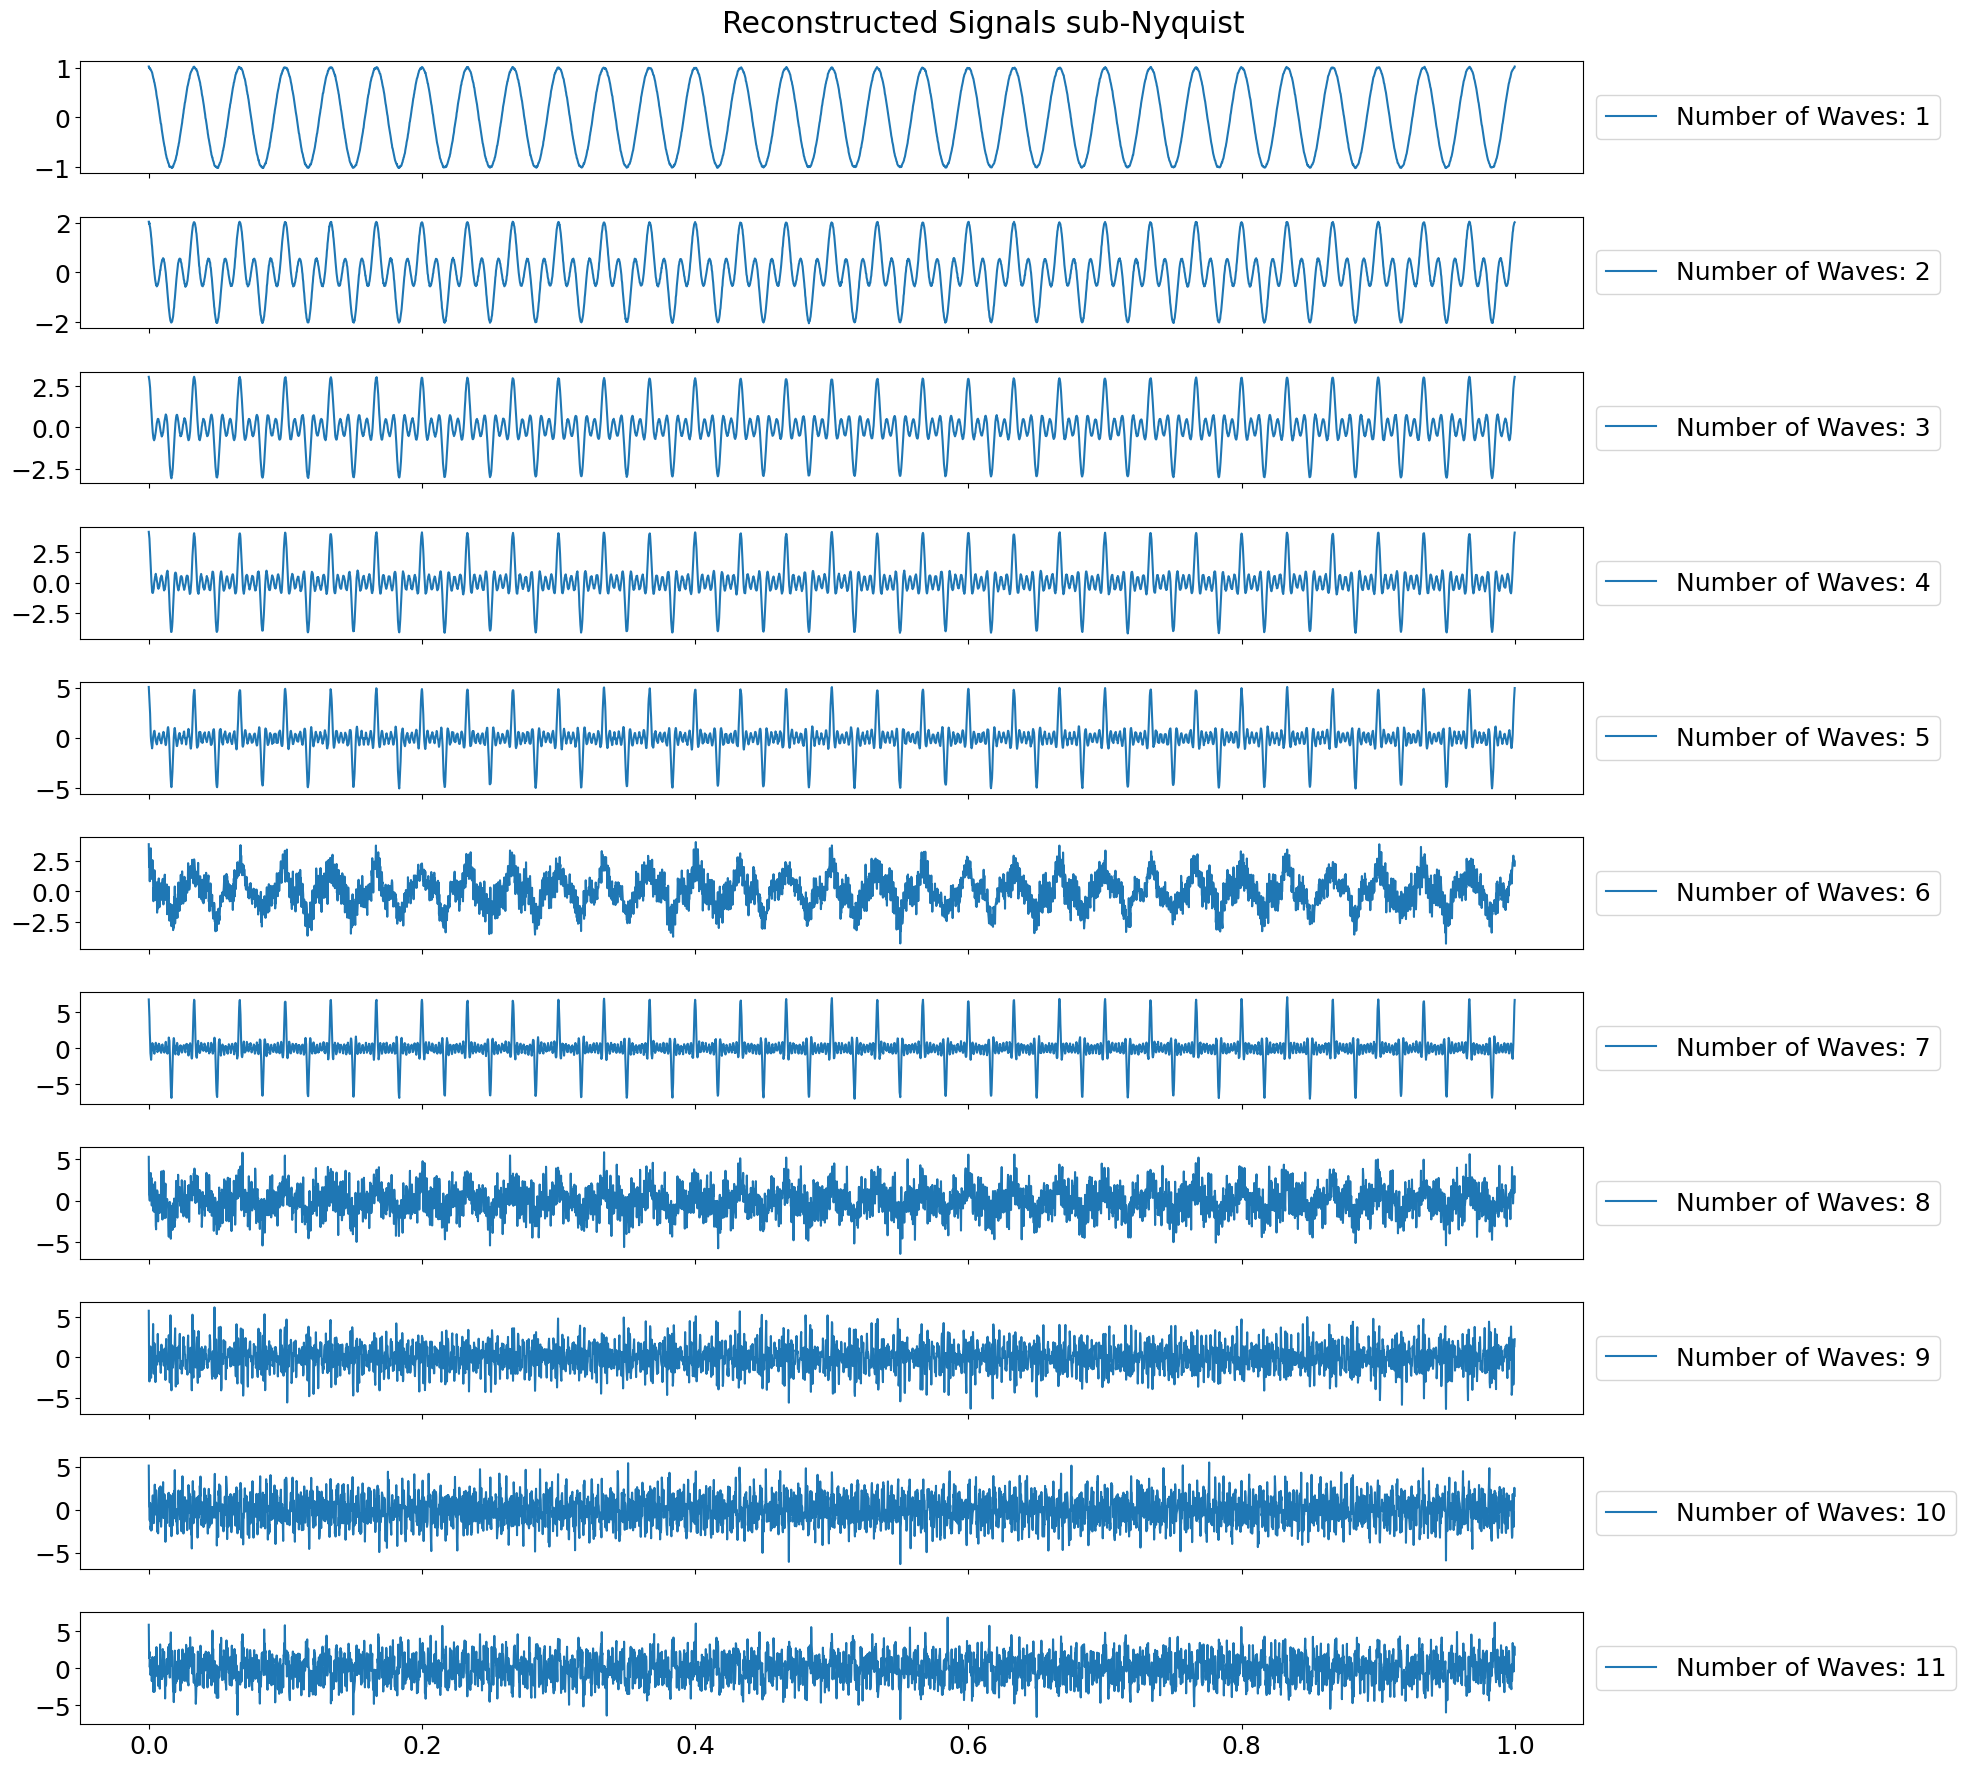

In [7]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})
t_recon = np.linspace(0,1,final_frequency * 2)

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(t,recon_sub_per_p[3][i], label = "Number of Waves: " + str(i+1))
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("Reconstructed Signals sub-Nyquist")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Plotting PSD of sub-Nyquist reconstruction:

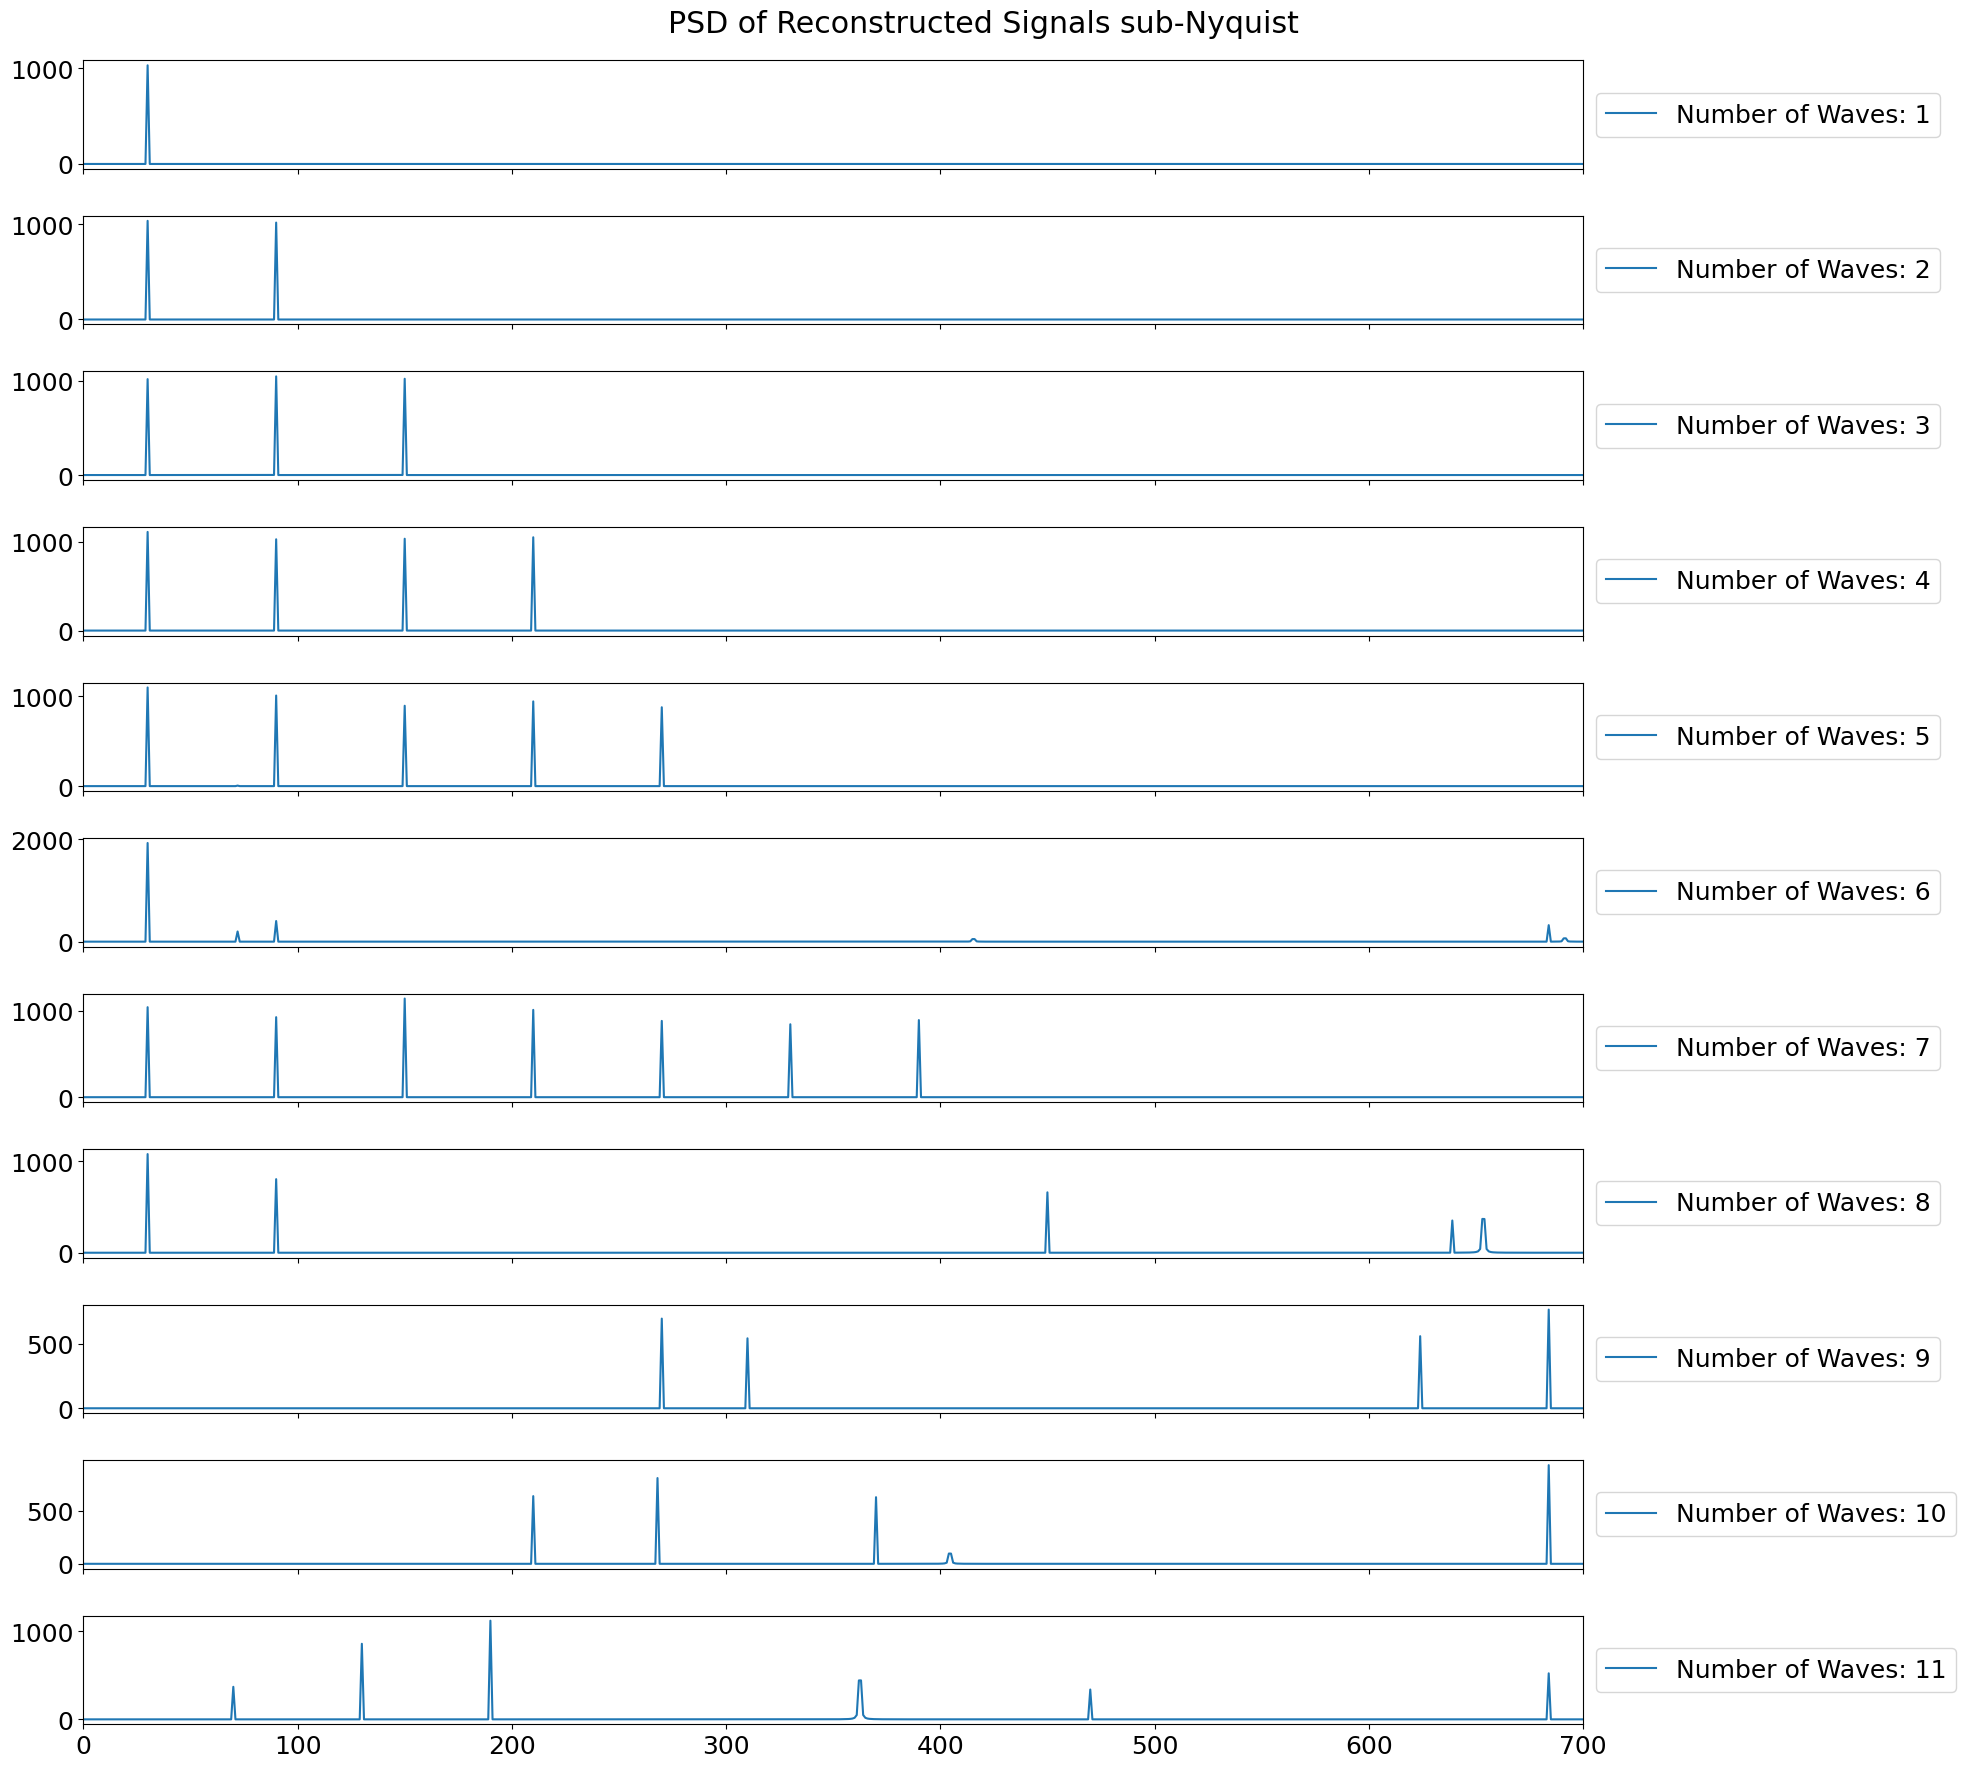

In [8]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(abs(PSD_sub_per_p[3][i]), label = "Number of Waves: " + str(i+1))
    axs[i].set_xlim(0,700)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Reconstructed Signals sub-Nyquist")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

Error of reconstructed signal compared to original. Blue is above Nyquist frequency. Orange is sub-Nyquist.

Number of uniformly-spaced sample points for above Nyquist frequency sampling n = 1260

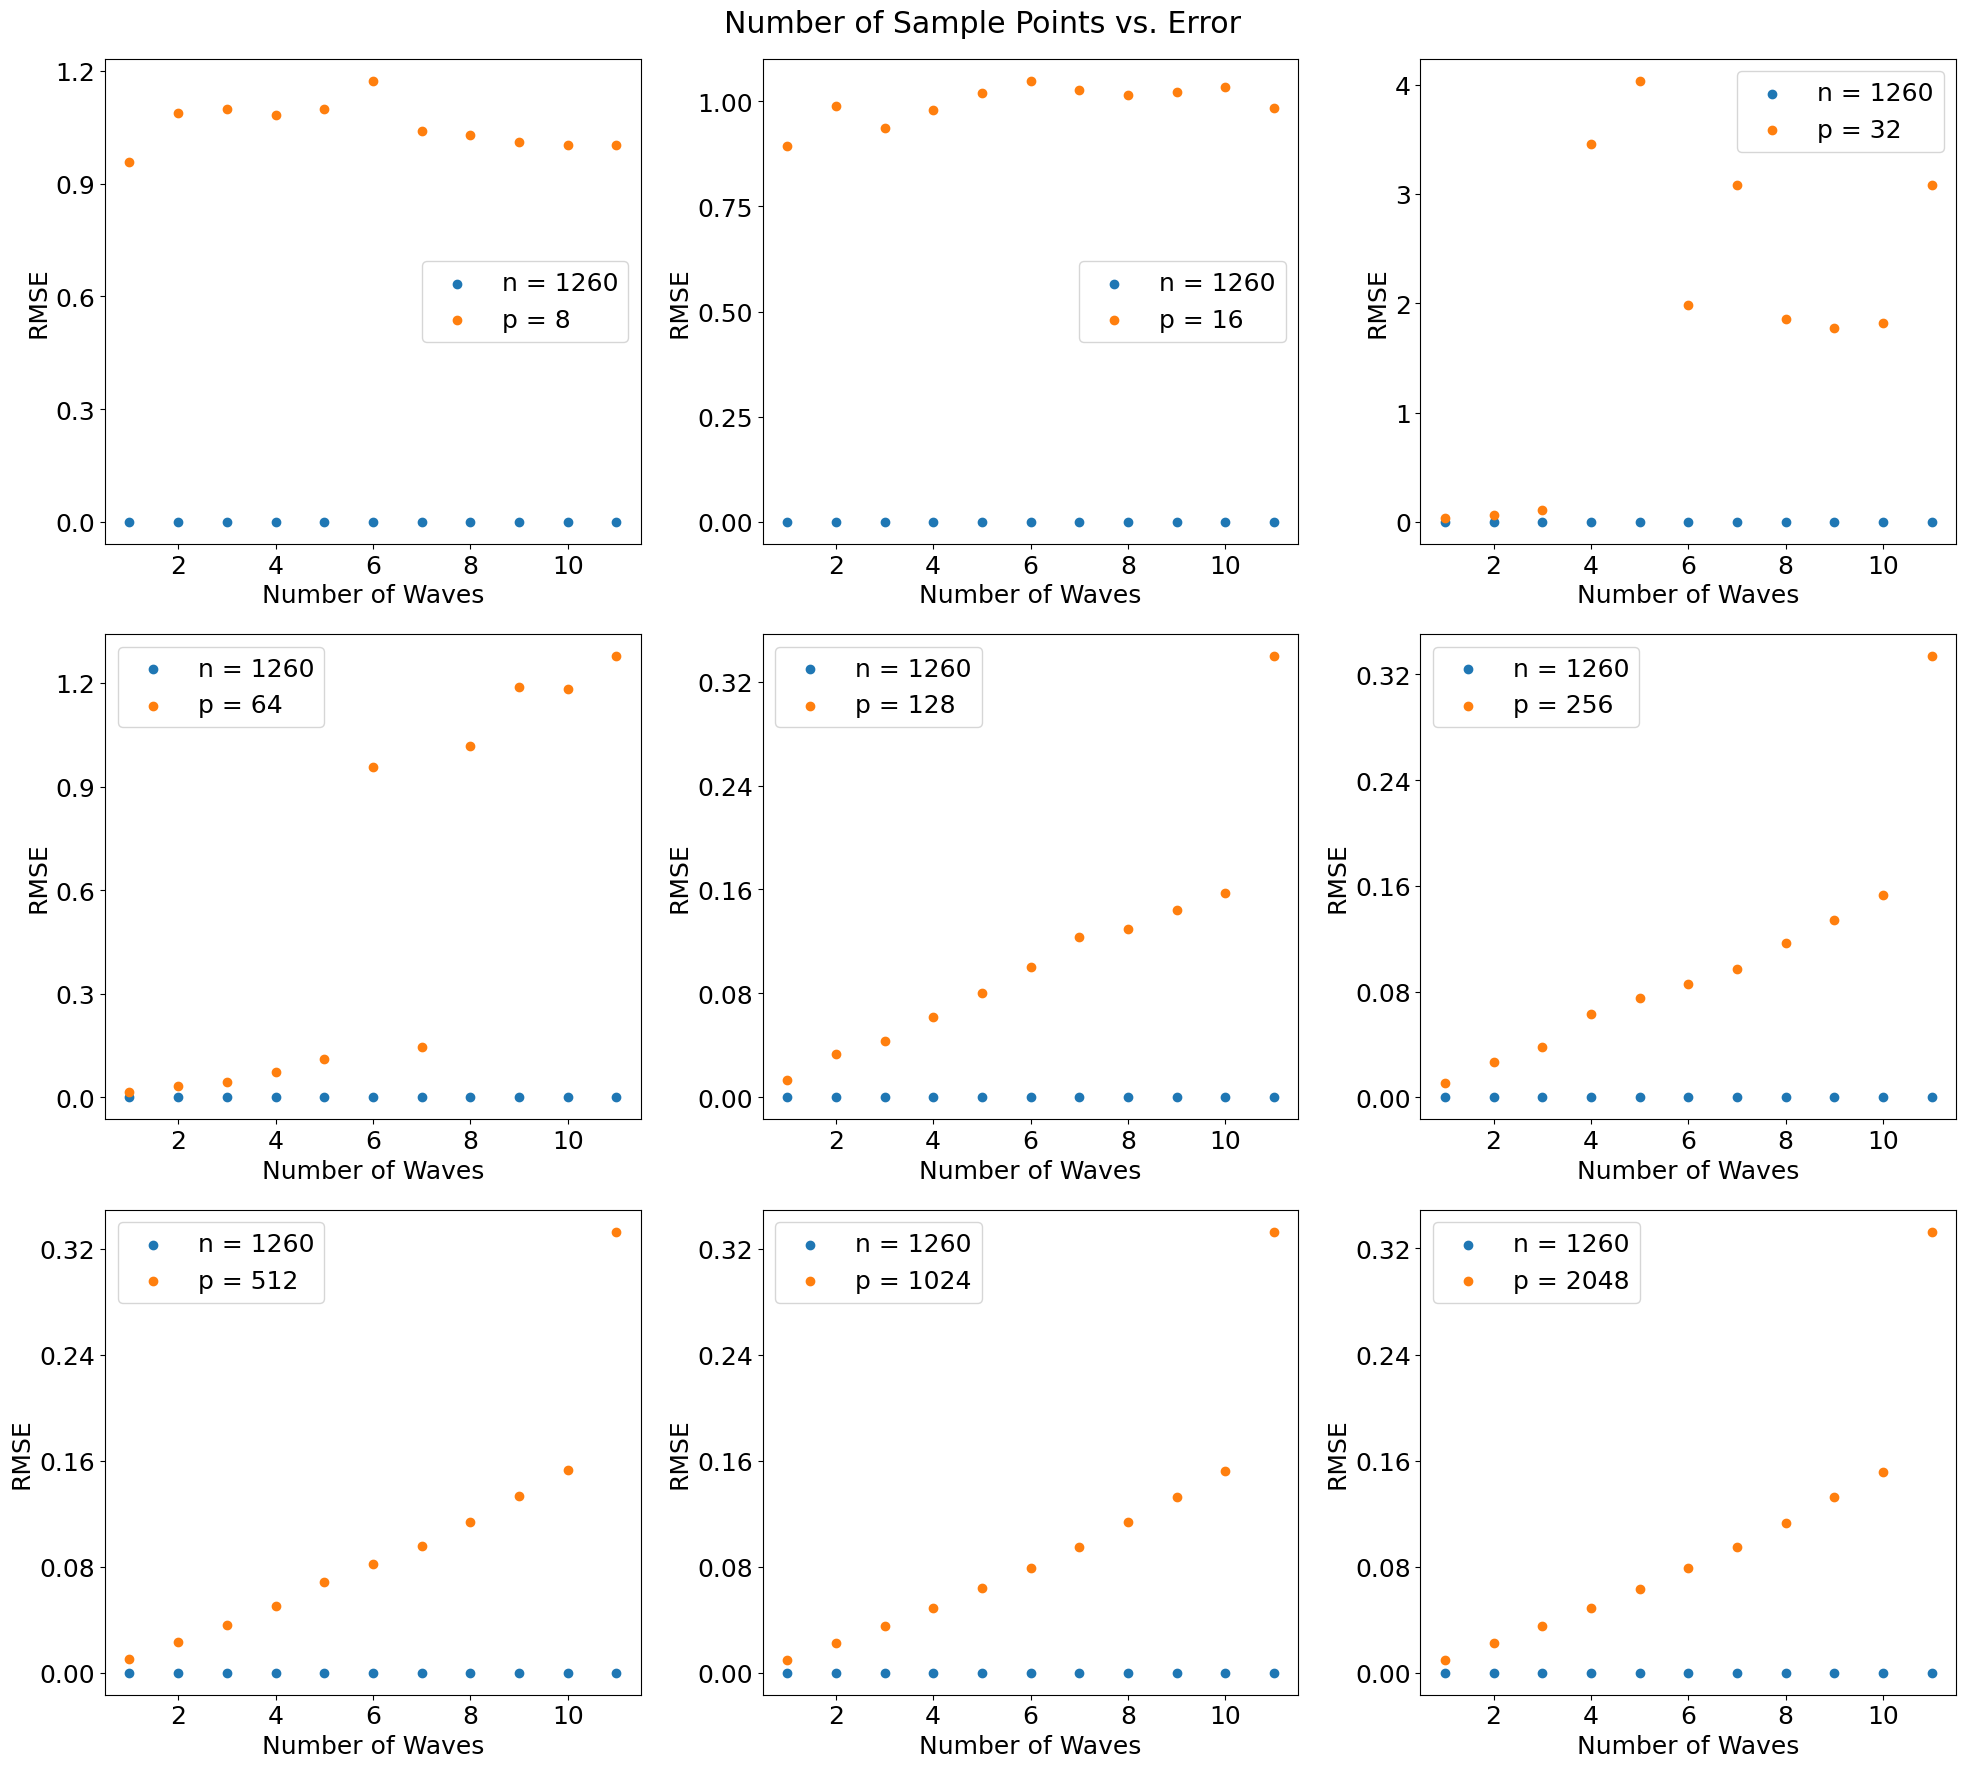

In [9]:
ig1,ax1 = plt.subplots(3,3)
ax1 = ax1.reshape(-1)

for i, error in enumerate(err_reg_per_p):
    ax1[i].scatter(no_of_waves,np.array(err_reg_per_p[i]).astype(float), label = "n = 1260")
    ax1[i].scatter(no_of_waves,np.array(err_sub_per_p[i]).astype(float), label = "p = " + str(p[i]))
    ax1[i].legend()
    ax1[i].set_xlabel("Number of Waves")
    ax1[i].set_ylabel("RMSE")

for ax in ax1:
    ax.tick_params(axis='y', labelrotation=0)

for ax in ax1:
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

ig1.suptitle("Number of Sample Points vs. Error")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

0.87525
[0.67165, 0.64607, 0.87525, 0.25741, 0.19827, 0.19449, 0.16988, 0.16423, 0.15648]


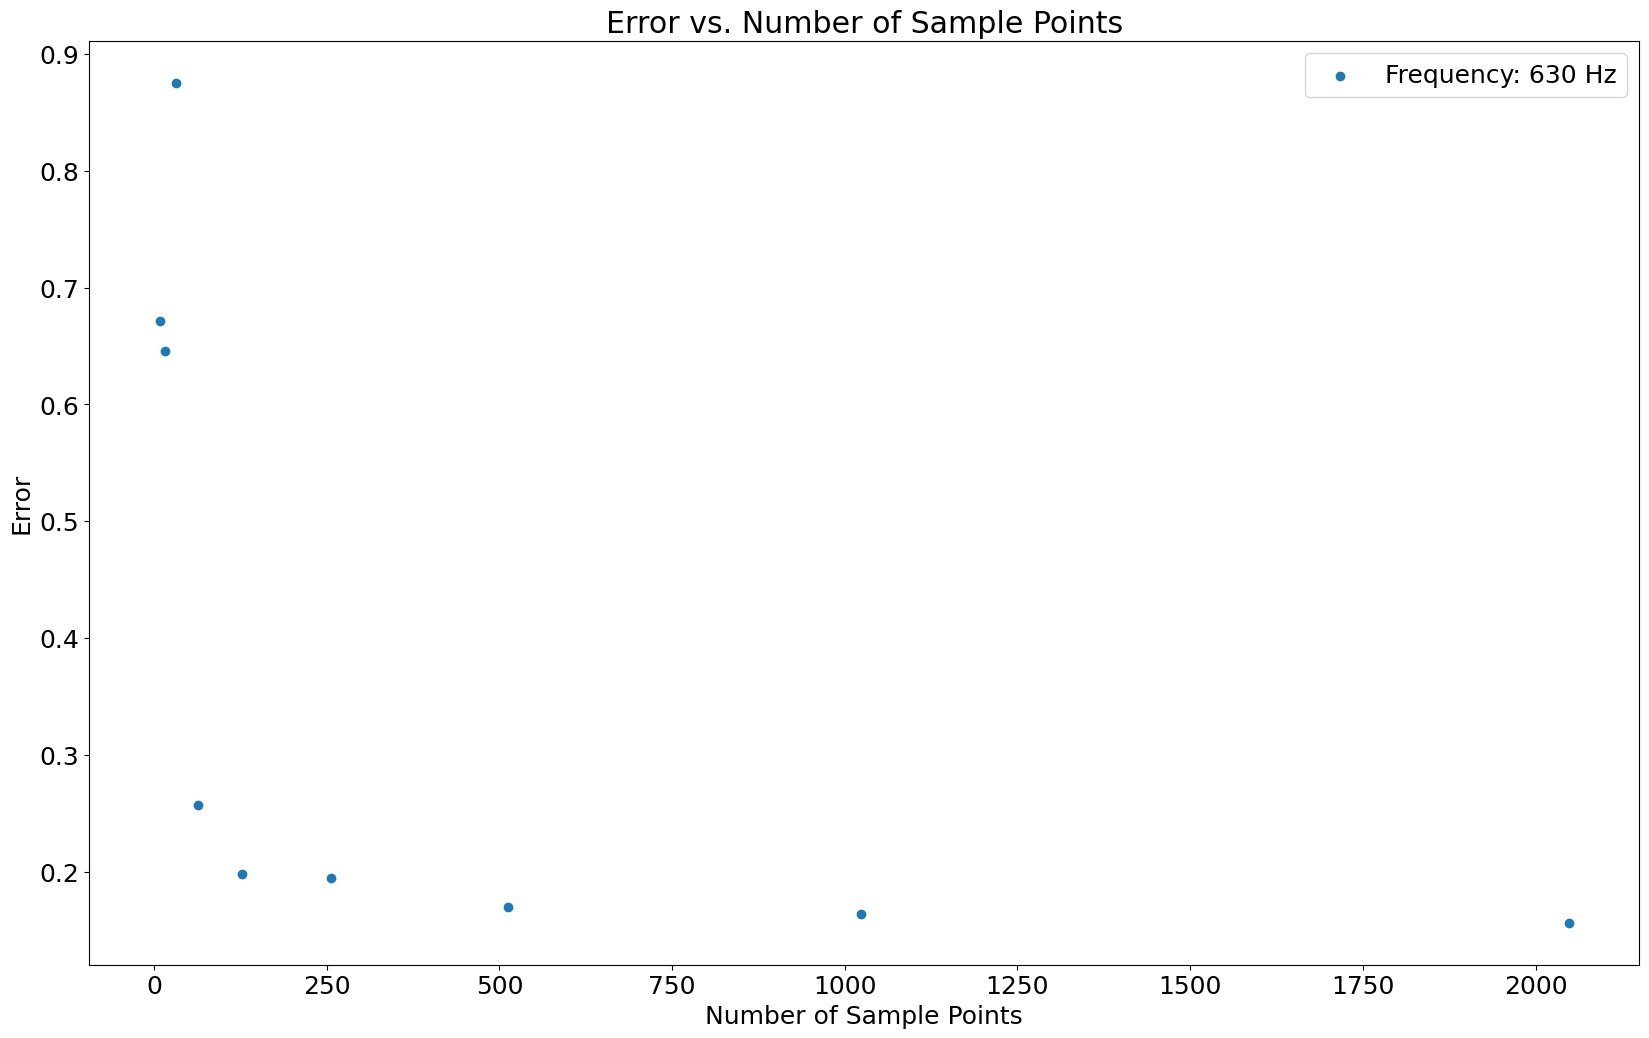

In [ ]:
print(err_sub_per_p[2][0])
y_values = []


for i in err_sub_per_p:
    y_values.append(float(i[0]))

print(y_values)
plt.scatter(p, y_values, label = "Frequency: 630 Hz")
plt.xlabel("Number of Sample Points")
plt.ylabel("Error")
plt.title("Error vs. Number of Sample Points")
plt.legend()

plt.show()

In [ ]:
spacing = 2 ** np.arange(1,9)
print(spacing)

for i in spacing:
    

[  2   4   8  16  32  64 128 256]


7.4019e-16


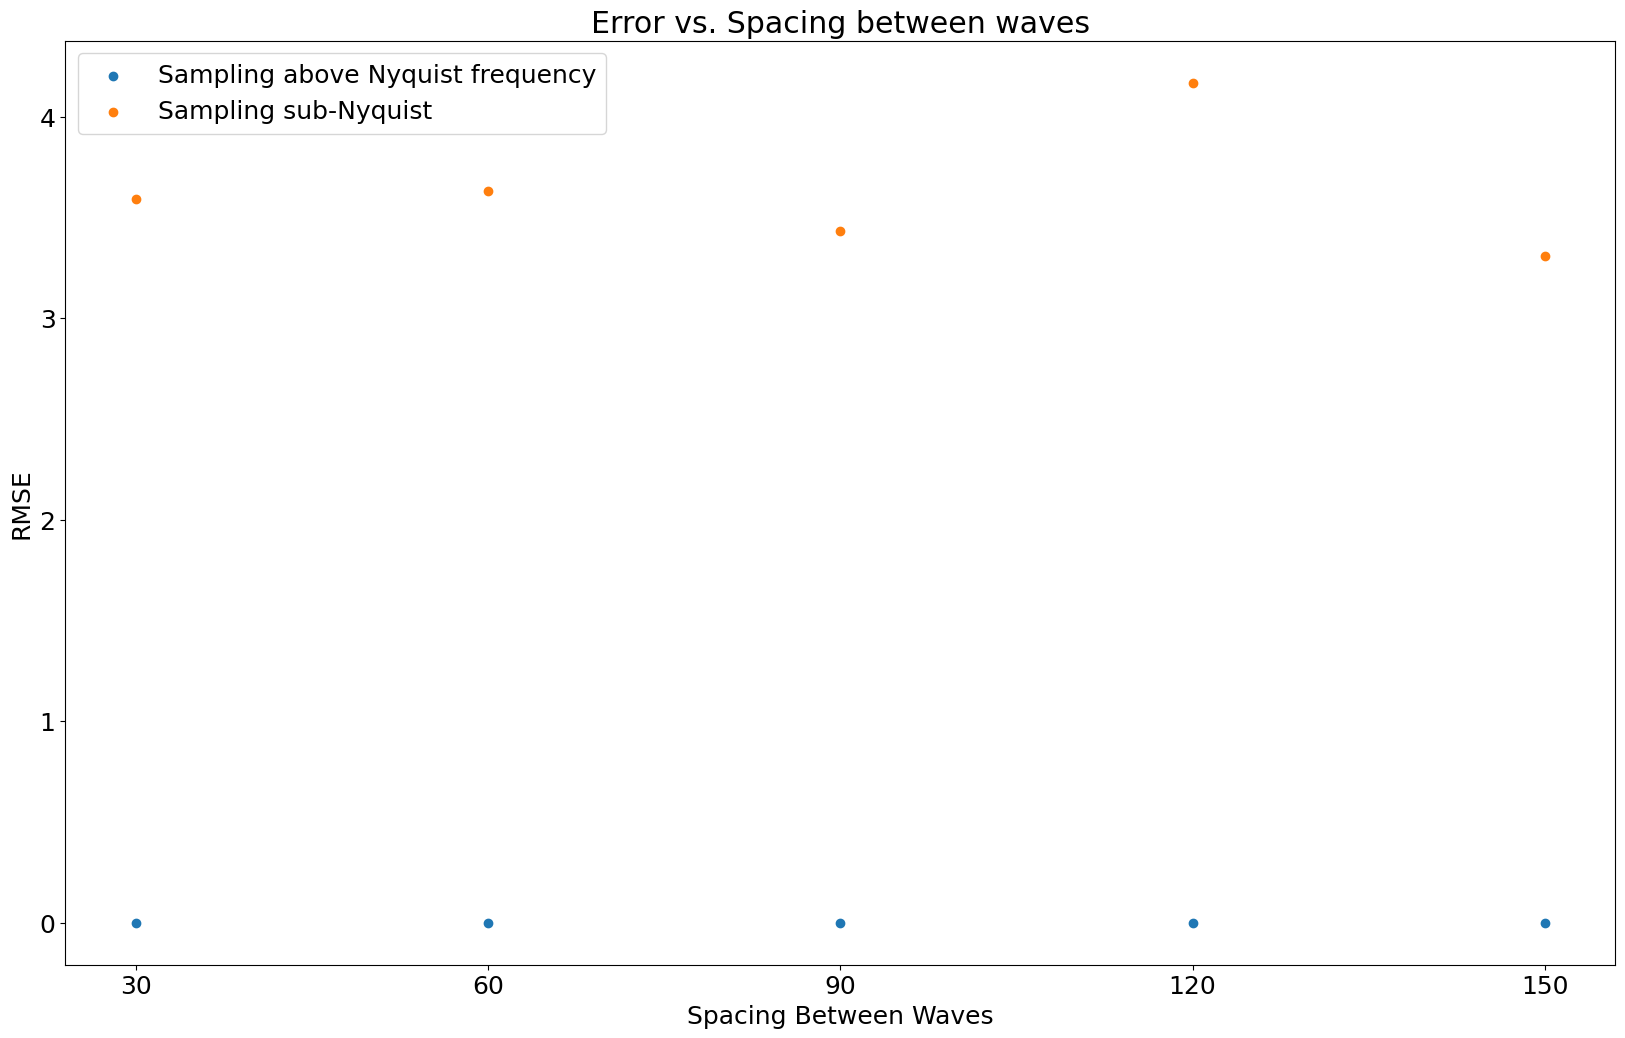

In [ ]:
print(error_60_reg[0][10])

error_reg = [float(error_30_reg[0][10]), float(error_60_reg[0][10]), float(error_90_reg[0][10]), float(error_120_reg[0][10]), float(error_150_reg[0][10])]
error_sub = [float(error_30_sub[0][10]), float(error_60_sub[0][10]), float(error_90_sub[0][10]), float(error_120_sub[0][10]), float(error_150_sub[0][10])]
spacing = np.arange(30,151,30)

plt.scatter(spacing, error_reg, label = "Sampling above Nyquist frequency")
plt.scatter(spacing, error_sub, label = "Sampling sub-Nyquist")
plt.legend()
plt.title("Error vs. Spacing between waves")
plt.xlabel("Spacing Between Waves")
plt.ylabel("RMSE")
plt.xticks(spacing)
plt.show()